In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Exploratory Data Analysis (EDA)

Generally, exploratory data analysis (EDA) is termed as an approach to look inside the big-data by using multiple techniques particularly graphical visualization. Data exploratory techniques are commonly quantitative in nature which are typically used to plot the raw data to identify the distribution of provided data.

Current work is based on the interstellar ship named as "Spaceship Titanic" which carried about 13,000 passengers from different regions of our solar system, launched a month ago. Unfortunately,the ship faced an accident due to space-time anomaly inside dust cloud. About half of the passengers were transported to another destination safely. This data includes detail attributes of passengers including their Passenger_Id,Home_Planet, Cabin, Age and etc collected from the damaged operating computer system.


## Steps Including EDA of Spaceship Titatnic

1. Import libraries
2. Uploading Input Data
3. Data Description
4. Evaluation of Missing Data Values
5. Combining input datasets
6. Characterization of features in dataset
7. Handling Missing Data Values
8. Data Visualization
9. Conclusions


### 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

### 2. Uploading Input Data

In [3]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv', index_col="PassengerId")
test_df  = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv',  index_col="PassengerId")

In [4]:
train_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [5]:
test_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


### 3. Data Description

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(6), object(6)
memory usage: 434.4+ KB


### 4. Evaluation of Missing Data Values

 -  Typically, large datasets have some missing values which are quite essential to be evaluated before training the machine for better predictions. 

<AxesSubplot:>

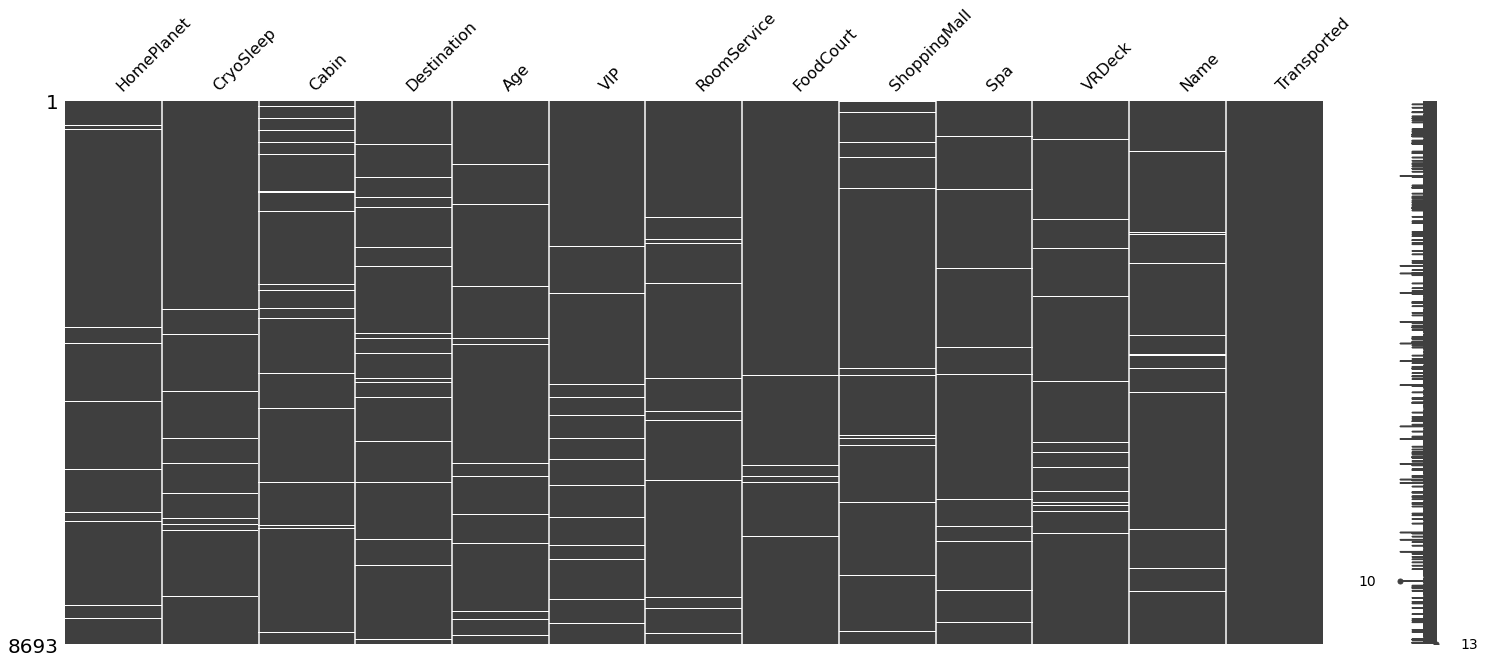

In [8]:
missingno.matrix(train_df)

<AxesSubplot:>

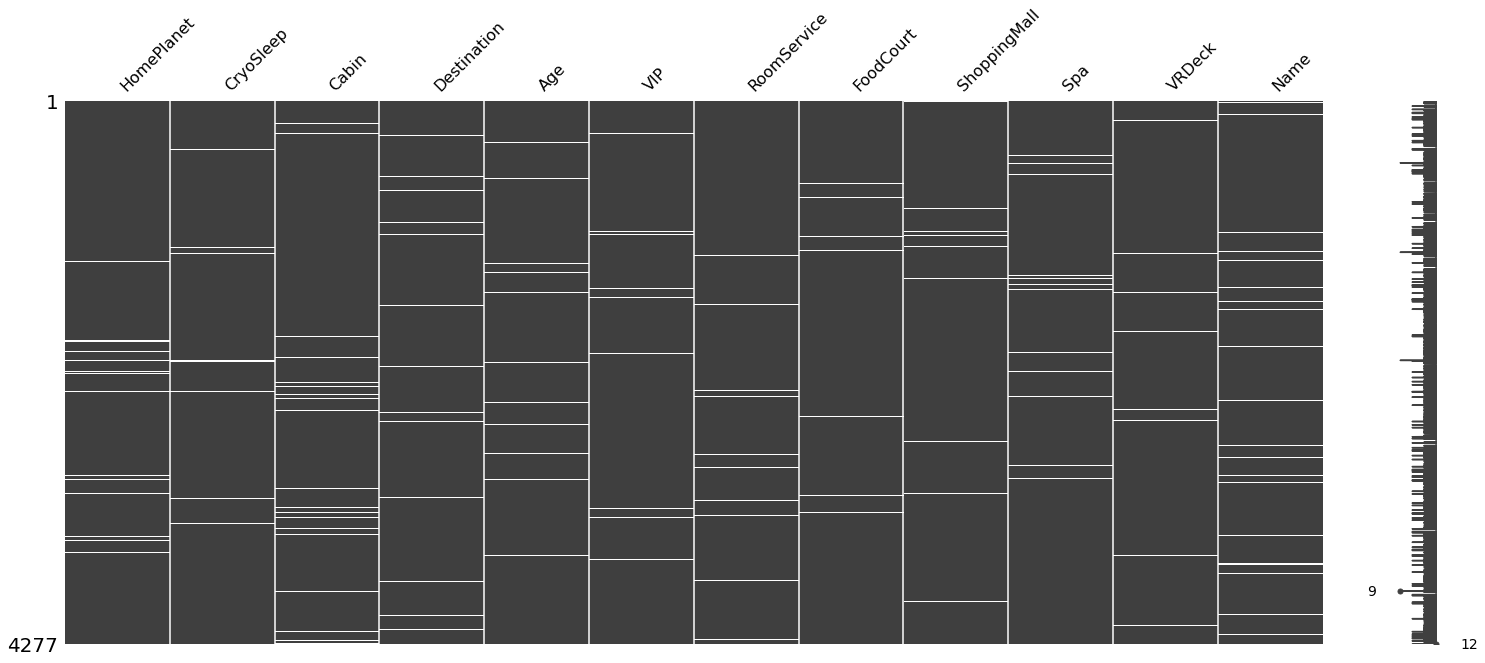

In [9]:
missingno.matrix(test_df)

- Above mentioned plots of both trained and test datasets contained a lot of missing values which required to be handeled carefully. To evaluate number of count of missing values, isnull() function can be used. 

In [10]:
train_df.isnull().sum() 

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
train_df.isnull().sum().sum()

2324

In [12]:
test_df.isnull().sum() 

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [13]:
test_df.isnull().sum().sum()

1117

- So, trained dataset and test dataset contained about 2324 and 1117 missing data values respectively. 

### 5. Combining Input Datasets


  - Here for EDA, both (train and test) datasets were combined to analyze the summarized characteristics of whole data before training our machine to look inside the trends and co-relations between the variables. 

In [14]:
data_df = pd.concat([train_df, test_df], axis=0)

In [15]:
data_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN


<AxesSubplot:>

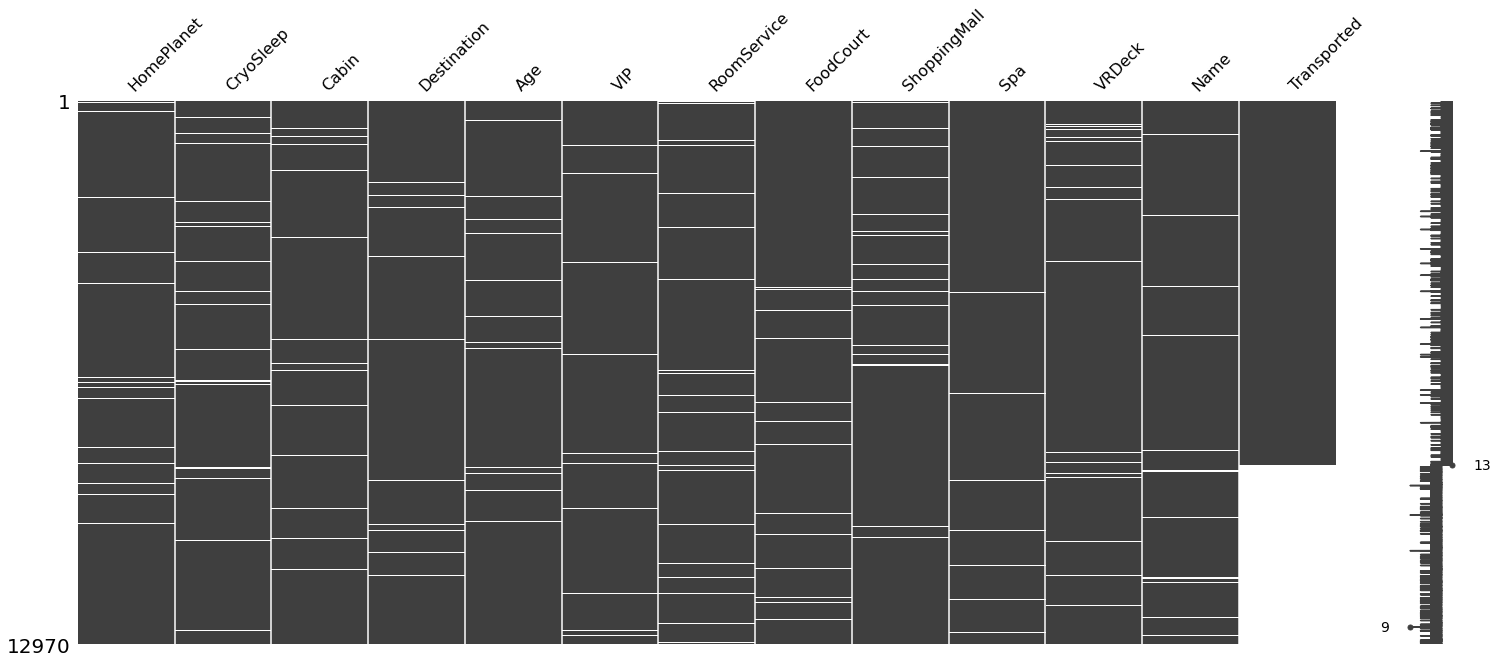

In [16]:
missingno.matrix(data_df)

In [17]:
data_df.isnull().sum()

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

### 6. Characterization of features in dataset

- Mainly, almost all the datasets conatined two different types of features: 

1. **Categorical Features**: limited or fixed data values like associated user information name, id etc. 
2. **Numerical Features**:   numeric data in logical order like height, weight etc.

In [18]:
data_df_categorical_features = data_df.select_dtypes(include='object')

In [19]:
data_df_categorical_features

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
PassengerId,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True
...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter,NaN
9269_01,Earth,False,NaN,TRAPPIST-1e,False,Matty Scheron,NaN
9271_01,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore,NaN


In [20]:
data_df_numerical_features = data_df.select_dtypes(include='number')

In [21]:
data_df_numerical_features

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0
0004_01,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
9266_02,34.0,0.0,0.0,0.0,0.0,0.0
9269_01,42.0,0.0,847.0,17.0,10.0,144.0
9271_01,NaN,0.0,0.0,0.0,0.0,0.0


### 7. Handling Missing Data Values

- In above **section 5**, a detail description of missing data values is provided. Almost all the data features (both categorical or numerical) contain number of missing data values.

- As per considering **categorical features** like HomePlanet, missing values can be replaced by using most common values rather than completely drop them from datasets. 

- However for **numeric features** like Age of the passengers, missing values can be replaced by taking mean of data values. 


#### 1. Categorical Features

In [22]:
data_df['HomePlanet'].fillna(data_df['HomePlanet'].mode() [0], inplace = True)
data_df['Cabin'].fillna(data_df['Cabin'].mode() [0], inplace = True)
data_df['Destination'].fillna(data_df['Destination'].mode() [0], inplace = True)

#### 2. Numerical Features

In [23]:
data_df['Age'].fillna(data_df['Age'].mean(), inplace=True)
data_df['RoomService'].fillna(data_df['RoomService'].mean(), inplace=True)
data_df['FoodCourt'].fillna(data_df['FoodCourt'].mean(), inplace=True)
data_df['ShoppingMall'].fillna(data_df['ShoppingMall'].mean(), inplace=True)
data_df['Spa'].fillna(data_df['Spa'].mean(), inplace=True)
data_df['VRDeck'].fillna(data_df['VRDeck'].mean(), inplace=True)
data_df['CryoSleep'].fillna(data_df['CryoSleep'].mean(), inplace=True)
data_df['VIP'].fillna(data_df['VIP'].mean(), inplace=True)


In [24]:
data_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
9269_01,Earth,False,G/160/P,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
9271_01,Mars,True,D/296/P,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN


<AxesSubplot:>

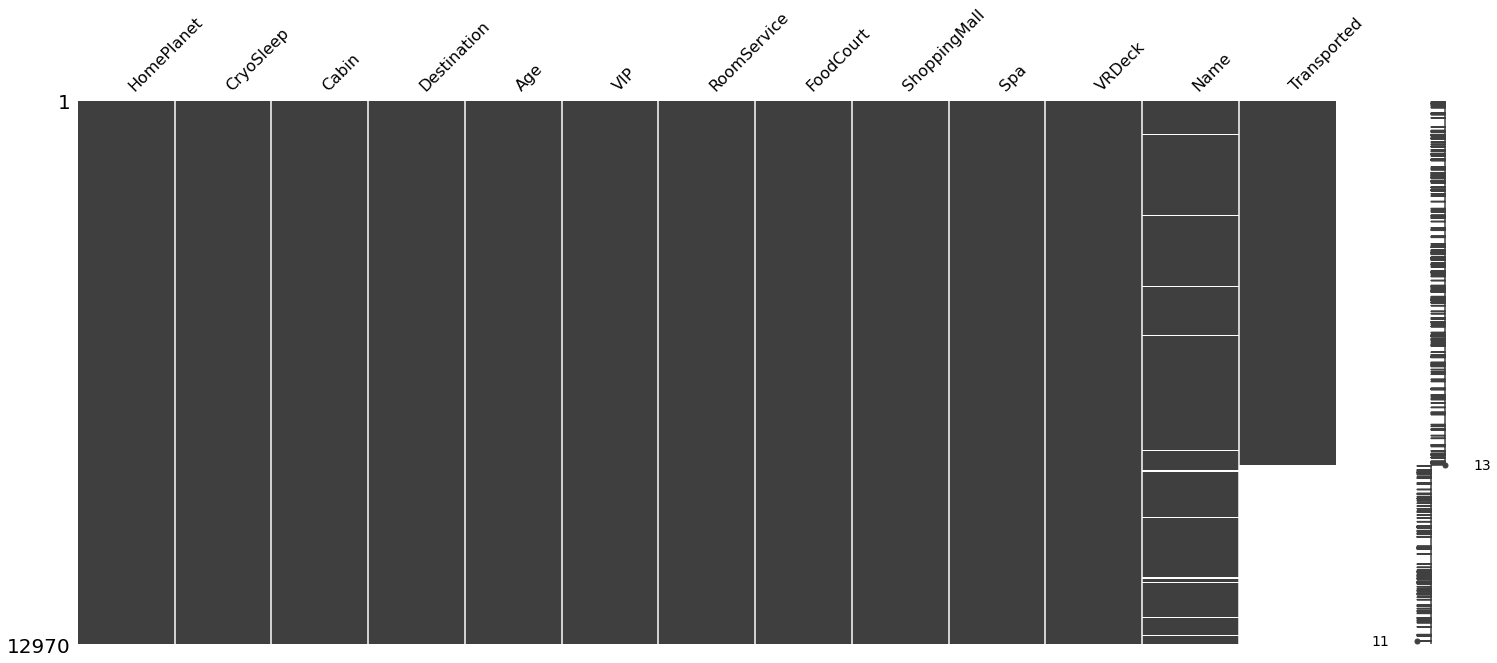

In [25]:
missingno.matrix(data_df)

- As **Name** column has uniqe values and not worthy to be considerable for predictions. So, we can eliminate that column from the datatset. 

In [26]:
data_df.drop(['Name'], axis=1, inplace=True)

<AxesSubplot:>

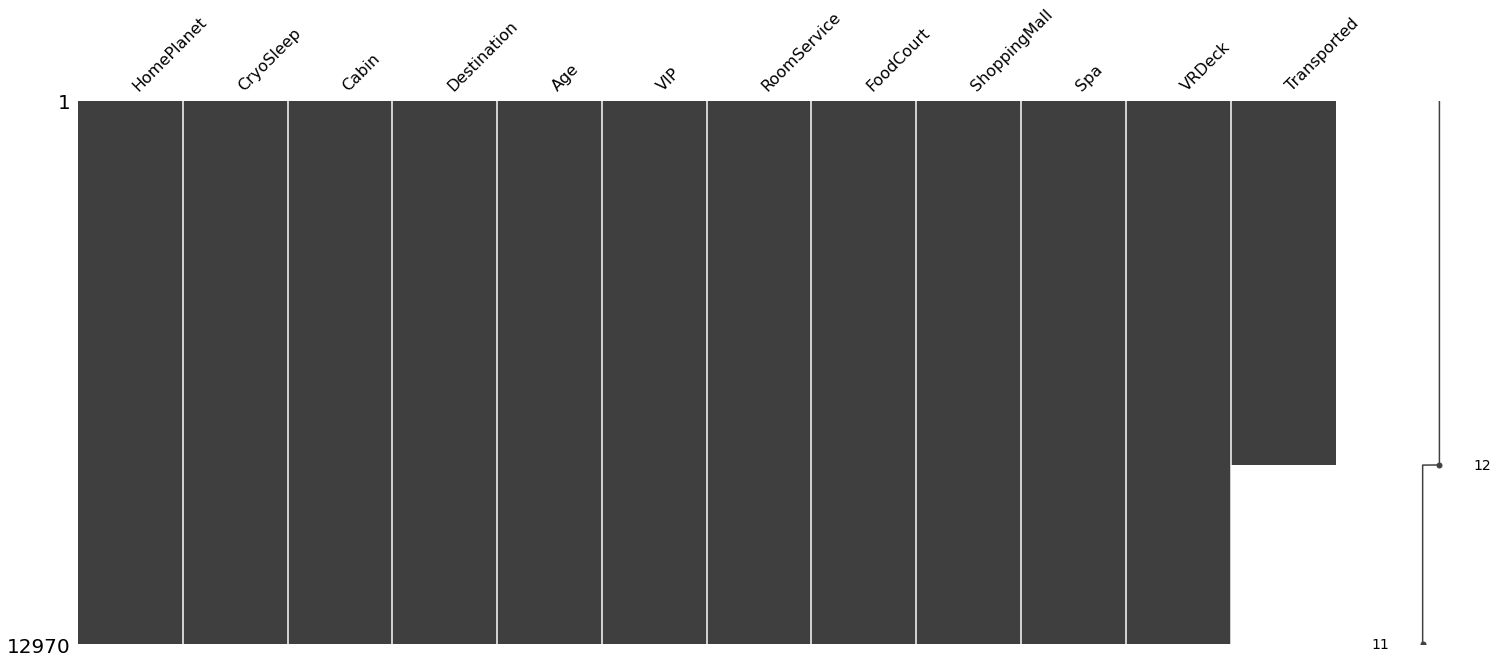

In [27]:
missingno.matrix(data_df)

- **So**, all the missing data values has been successfully handeled and the dataset is ready for further analysis. 

### 8. Data Visualization 

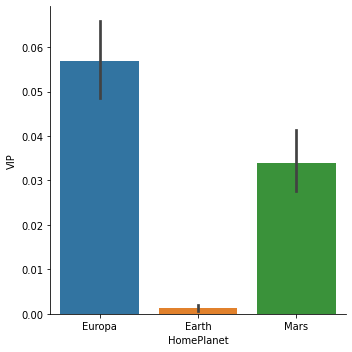

In [28]:
sns.catplot(data=data_df, x='HomePlanet', y="VIP", kind="bar")

- This plot suggested that the passengers belongs from **Europa paid more for VIP services than passengers of Mars.** 
- Whereas, Passenger from Earth paid significantly less than the Mars and Europa passengers. 

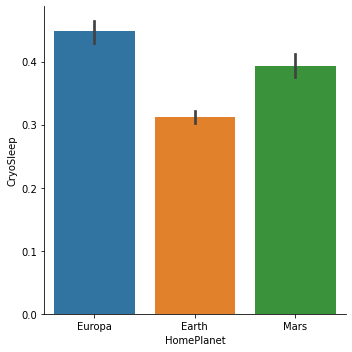

In [29]:
sns.catplot(data=data_df, x='HomePlanet', y="CryoSleep", kind="bar")

- According to above results, **passengers of Europa were preferably elected for cryosleep facilities** as compaered to the passnegers belonging from Mars and Earth respectively.

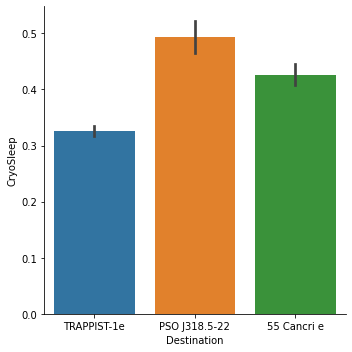

In [30]:
sns.catplot(data=data_df, x='Destination', y="CryoSleep", kind="bar")

- In above relationship, most of the passnegers who were facilitated by Cryosleep, were **debarked towards PSO J318.5-22.** 
- Other people were debarked, without much significant variation, towards the other destinations.  

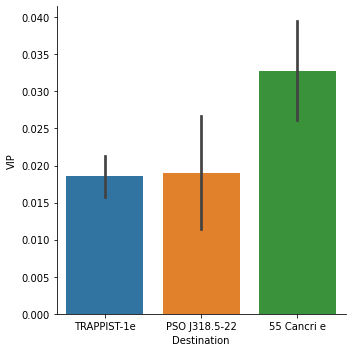

In [31]:
sns.catplot(data=data_df, x='Destination', y="VIP", kind="bar")


- **People who paid for VIP services, were significantly debarked towards 55 Cancri e.**

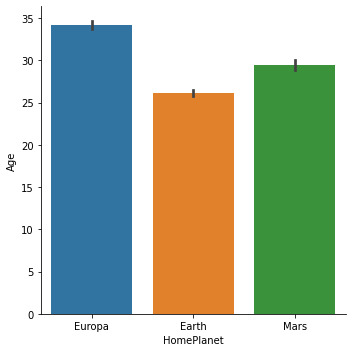

In [32]:
sns.catplot(data=data_df, x='HomePlanet', y='Age', kind='bar')

- Moreover, **People from Europa were compartively older than the other passengers belongs from Mars and Earth respectively.** 

In [33]:
num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

<AxesSubplot:>

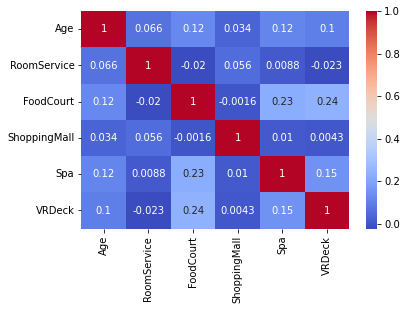

In [34]:
sns.heatmap(data_df[num_cols].corr(), annot=True, cmap="coolwarm")

In [35]:
data_df[num_cols].corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.066101,0.121210,0.034182,0.115982,0.099858
RoomService,0.066101,1.000000,-0.019720,0.055787,0.008801,-0.023429
FoodCourt,0.121210,-0.019720,1.000000,-0.001556,0.225865,0.240868
ShoppingMall,0.034182,0.055787,-0.001556,1.000000,0.010384,0.004301
Spa,0.115982,0.008801,0.225865,0.010384,1.000000,0.145348
VRDeck,0.099858,-0.023429,0.240868,0.004301,0.145348,1.000000


- Most of Spaceship Titanic's many luxury amenities are apparently not co-related with each other. 
- *VRDeck* showed highly **postive** correlation with amount paid at *FoodCourt*. Meanwhile it showed completly **negative** corelation with *shopping malls*.
- Whereas *Spa* have highly **positive** correlation values with *FoodCourt* and *Age*. It's mean mostly passengers paid for *Food* and *Spa* services.  

### 9. Conclusions

- Apparently, Passengers belonging from Europa showed significant  distribution as compared to other HomePlanets in terms of their ages, Paying for VIP facilities, availing of crayosleep facilities and etc. Further analysis can help to predict the possible transportation of passengers belonging from either homeplanet.  